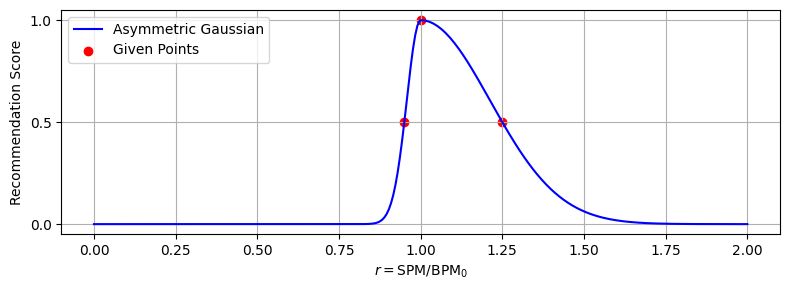

sigma_left: 0.042466090014401006, sigma_right: 0.21233045007200477


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize as opt

# 与えられた点
x_data = np.array([0.95, 1.0, 1.25])
y_data = np.array([0.5, 1.0, 0.5])

# 非対称な関数として、片側ロジスティック関数の修正を試す

# 非対称ガウス関数（左側が緩やか、右側が急激）
def asymmetric_gaussian(x, A, x0, sigma_left, sigma_right):
    sigma = np.where(x < x0, sigma_left, sigma_right)  # x < x0 のとき左側の σ を適用
    return A * np.exp(-((x - x0) ** 2) / (2 * sigma ** 2))

# 初期パラメータ推定
A_init = 1.0  # ピーク値
x0_init = 1.0  # ピーク位置（固定）
sigma_left_init = 0.15  # 左側の幅（広め）
sigma_right_init = 0.08  # 右側の幅（狭め）

# 最適化（x=1のピークは固定）
params, _ = opt.curve_fit(lambda x, sl, sr: asymmetric_gaussian(x, 1.0, 1.0, sl, sr), 
                          x_data, y_data, p0=[sigma_left_init, sigma_right_init], bounds=([1e-6, 1e-6], [np.inf, np.inf]))

# 最適化されたパラメータ
sigma_left_opt, sigma_right_opt = params

# x範囲の設定
x_range = np.linspace(0, 2, 300)
y_fit_asym = asymmetric_gaussian(x_range, 1.0, 1.0, sigma_left_opt, sigma_right_opt)

# グラフ描画
plt.figure(figsize=(8, 3))
# plt.plot(x_range, y_fit_asym, label=f'Asymmetric Gaussian: $\sigma_{{left}}={sigma_left_opt:.3f}$, $\sigma_{{right}}={sigma_right_opt:.3f}$', color='blue')
plt.plot(x_range, y_fit_asym, label=f'Asymmetric Gaussian', color='blue')
plt.scatter(x_data, y_data, color='red', label='Given Points')
# plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
# plt.axvline(1.0, color='gray', linestyle=':', label=f'Peak at $x=1.0$')

plt.yticks([0.0, 0.5, 1.0])
plt.xlabel(r'$r = \mathrm{SPM} / \mathrm{BPM}_0$')
plt.ylabel('Recommendation Score')
# plt.title('Asymmetric Gaussian Function')
plt.legend(loc='upper left')
plt.grid()
plt.tight_layout()
plt.savefig('asymmetric_gaussian_fit.png', dpi=300)
plt.show()

# 最適化されたパラメータを表示
print(f"sigma_left: {sigma_left_opt}, sigma_right: {sigma_right_opt}")
